2.3 线性模型实战
𝑦 = 1.477*𝑥 + 0.089 + 𝜖, 𝜖 ∼ 𝒩( 0, 0.0001)

[[  9.20417431  13.69122708]
 [  4.82787393   7.2173452 ]
 [  0.02079369   0.11527885]
 [  9.53071497  14.15555444]
 [  7.96415251  11.84478784]
 [ -4.82995495  -7.04240559]
 [  1.96833132   3.00065623]
 [ -8.89759317 -13.0518077 ]
 [  5.75633846   8.59224206]
 [  1.1079311    1.71491891]
 [  1.64417132   2.52382628]
 [  7.43351217  11.06363956]
 [ -8.26694317 -12.1325088 ]
 [ -2.4991174   -3.60605303]
 [ -1.76971621  -2.51355303]
 [ -2.87124198  -4.15804787]
 [  3.18752749   4.78986546]
 [  2.67956076   4.04698632]
 [ -9.85548883 -14.47833369]
 [ -1.77503714  -2.52884312]
 [ -8.5641365  -12.54870572]
 [  3.38662202   5.10384495]
 [ -4.35309709  -6.32631882]
 [  7.97910932  11.87587697]
 [ -9.89144611 -14.52701233]
 [  8.72851285  12.97823382]
 [  8.5444937   12.73717243]
 [ -5.0816216   -7.42277423]
 [ -3.22964612  -4.68172363]
 [  4.27436932   6.37526823]
 [ -6.4141198   -9.38172634]
 [  2.94895668   4.4365812 ]
 [  1.15170769   1.8138591 ]
 [ -1.7364244   -2.47435263]
 [  7.55935877

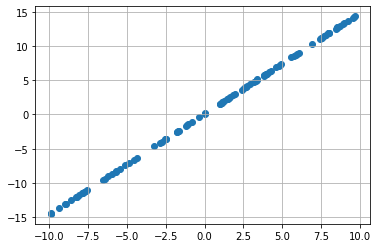

In [49]:
import matplotlib.pyplot as plt
# 1 采样数据
import numpy as np

data = []
for i in range(100):
    #随机采样
    x = np.random.uniform(-10., 10.)
    #采样高斯噪声
    eps = np.random.normal(0., 0.01)
    #得到模型的输出
    y = 1.477*x + 0.089 + eps
    #保存样本
    data.append([x,y])
    
data = np.array(data)
print(data)
plt.scatter(data[:,0],data[:,1])
plt.grid()
plt.show()

In [43]:
# 2 计算误差
def mse(b, w ,points):
    # 根据 w,b 参数计算均方差损失
    totalErr = 0
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        #计算差的平方
        totalErr += (y - (w*x + b)) **2
    #将累加的误差求平均，得到均方差
    return totalErr / float(len(points))
        

In [44]:
#计算梯度
def step_gradient(b_current, w_current, points, lr):
    #计算误差函数所在点上的导数，并更新w,b
    b_gradient = 0
    w_gradient = 0
    M = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # 误差函数对b的导数:
        b_gradient += (2/M) * ((w_current*x + b_gradient) - y)
        w_gradient += (2/M) * x * ((w_current*x + b_gradient) - y)
    # 根据梯度下降算法更新 w',b',其中lr 为学习率
    new_b = b_current - (lr * b_gradient)
    new_w = w_current - (lr * w_gradient)
    return [new_b, new_w]
        

In [45]:
#梯度更新
def gradient_descend(points, starting_b,starting_w,lr,num_iterations):
    #循环更新 w,b多次
    b = starting_b
    w = starting_w
    #更新多次
    for step in range(num_iterations):
        #计算梯度并更新
        b, w = step_gradient(b, w, np.array(points), lr)
        loss = mse(b,w,points)
        if step%50 == 0:
            print(f"iteration:{step}, loss:{loss}, w:{w},b:{b}")
    return [b,w]

In [46]:
def main():
    lr = 0.01
    initial_b = 0
    initial_w = 0
    num_iterations = 1000
    [b, w] = gradient_descend(data, initial_b, initial_w, lr, num_iterations)
    loss = mse(b, w, data)
    print(f'Final loss:{loss}, w:{w}, b:{b}')

if __name__ == '__main__':
    main()

iteration:0, loss:10.488854785380854, w:0.8832160750377132,b:0.02728772379026339
iteration:50, loss:0.05413122138603836, w:1.4834704768561044,b:0.31479247675712585
iteration:100, loss:0.2539246224745342, w:1.4834704768561044,b:0.5874580499577126
iteration:150, loss:0.6024110531806393, w:1.4834704768561044,b:0.8601236231582993
iteration:200, loss:1.0995905135043471, w:1.4834704768561044,b:1.1327891963588832
iteration:250, loss:1.7454630034456533, w:1.4834704768561044,b:1.4054547695594644
iteration:300, loss:2.540028523004564, w:1.4834704768561044,b:1.6781203427600455
iteration:350, loss:3.4832870721810765, w:1.4834704768561044,b:1.9507859159606267
iteration:400, loss:4.575238650975191, w:1.4834704768561044,b:2.223451489161208
iteration:450, loss:5.815883259386911, w:1.4834704768561044,b:2.496117062361789
iteration:500, loss:7.205220897416229, w:1.4834704768561044,b:2.76878263556237
iteration:550, loss:8.743251565063154, w:1.4834704768561044,b:3.0414482087629513
iteration:600, loss:10.42